<a href="https://www.kaggle.com/code/dataminingee/multiple-models-predict-boston-house-price?scriptVersionId=148053002" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Boston House Prices Prediction

# Table of Contents
1. [Environment](#Environment)
2. [Load Data](#Load-Data)
3. [Data Analysis](#Data-Analysis)
4. [Data Preprocessing](#Data-Preprocessing)
5. [Data Visualization](#Data-Visualization)
6. [Feature Selection](#Feature-Selection)
7. [Models Init](#Models-Init)
8. [Models Evaluation](#Models-Evaluation)
9. [GridSearchCV](#GridSearchCV)
10. [Final Ensemble Evaluation](#Fianl-EnsembleEvaluation)

# Environment <a class="anchor" id="Environment"></a>
|Environment|Name|Version|
|-|-|-|
|Run Environment|jupyter notebook|6.5.2|
|python|python3|3.8.8|
|Install method|pip|23.2.1|
|Conda|conda|4.11.0|


## Package Version
|Package|Version|
|-|-|
|numpy|1.23.4|
|pandas|4.11.0|
|scikit-learn|1.0.2|
|seaborn|0.11.0|
|xgboost|2.0.0|
|catboost|1.2.2|
|lightgbm|4.1.0|

In [1]:
# Import

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import make_scorer
import numpy as np
import pandas as pd

import pandas as pd
import numpy as np

In [2]:
# random
import random
random.seed(1)

# Load Data<a class="anchor" id="Load-Data"></a>

In [3]:
name= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_df = pd.read_csv(filepath_or_buffer="../input/boston-house-prices/housing.csv",delim_whitespace=True,names=name)
raw_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Data Analysis<a class="anchor" id="Data-Analysis"></a>

Boston House Price dataset has 14 features and their description is given as follows:

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per dollar 10,000.
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's

# Take a peek at the data

In [4]:
print(raw_df.shape)
print(raw_df['MEDV'].size)

(506, 14)
506


# Data Preprocessing<a class="anchor" id="Data-Preprocessing"></a>

## Data Imputation
There are not missing value

In [5]:
df = raw_df
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Visualization<a class="anchor" id="Data-Visualization"></a>

## Box Plot

In [7]:
# Plot Design
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

In [8]:
import plotly.express as px

# plt.figure(figsize=(14, len(df.columns) *2.5))
for i, col in enumerate(df.columns):
    fig = px.box(data_frame=df,y=col,orientation='v', 
                 color_discrete_sequence=['lightblue'], template='ggplot2')
    fig.show()
    
# plt.tight_layout()
# plt.show()

## Histogram Plot

In [9]:
for i, col in enumerate(df.columns):
    fig = px.histogram(data_frame=df, x=col, nbins=50, 
                       color_discrete_sequence=['#237fb8'], 
                       template= 'ggplot2')
    fig.show()

# Heatmap

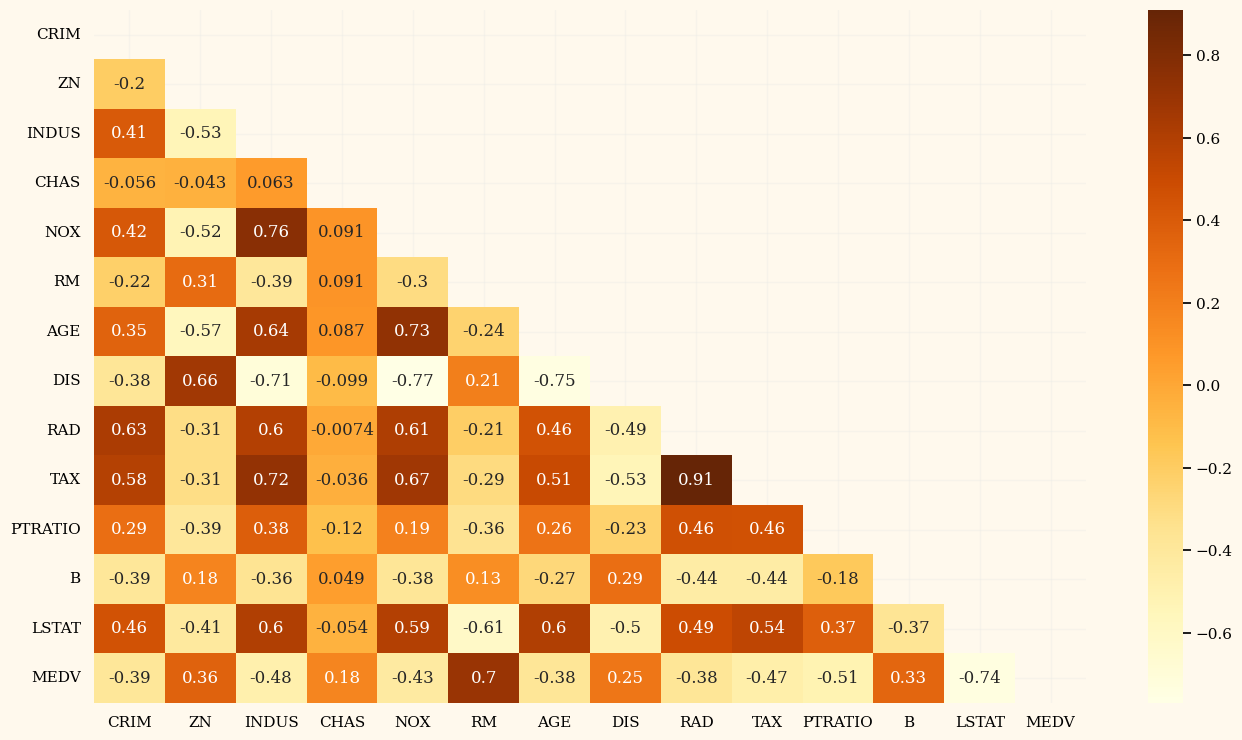

In [10]:
plt.figure(figsize=(16, 9))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, annot=True, cmap="YlOrBr")
plt.show()

# Feature Selection<a class="anchor" id="Feature-Selection"></a>

Choose the best performance feature

In [11]:
X = pd.DataFrame(np.c_[df.RM, df.LSTAT], # Please put features inside the bracket
                 columns = ["RM", "LSTAT"] # Please put feature names here 
                )

target_column = 'MEDV'
corr_filtered = corr.drop('MEDV',axis=0)
# Select Feature
feature_columns1 = corr_filtered[(abs(corr_filtered['MEDV']) >= 0.6)].index
feature_columns2 = corr_filtered[(abs(corr_filtered['MEDV']) >= 0.4)].index
feature_columns3 = corr_filtered[(abs(corr_filtered['MEDV']) >= 0.2)].index

print(feature_columns1)
print(feature_columns2)
print(feature_columns3)

Index(['RM', 'LSTAT'], dtype='object')
Index(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')
Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


## Using Linear Regression and RandomForestRegressor to test which feature columns is best 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X1 = StandardScaler().fit_transform(pd.DataFrame(df[feature_columns1]))
X2 = StandardScaler().fit_transform(pd.DataFrame(df[feature_columns2]))
X3 = StandardScaler().fit_transform(pd.DataFrame(df[feature_columns3]))
Y = df[target_column]
X = {'feature1':X1, 'feature2':X2, 'feature3':X3}

In [13]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mse_dict = {}
r2_dict = {}
for key, X_df in X.items():
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    mse_list = []
    r2_list = []
    for train_index, test_index in kf.split(X_df,Y):
        X_train, y_train = X_df[train_index], Y[train_index]
        X_test, y_test = X_df[test_index], Y[test_index]
        
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        
        # Prediction
        y_pred = lr.predict(X_test)
        
        # Score and MSE
        mse_list.append(mean_squared_error(y_test, y_pred))
        r2_list.append(r2_score(y_test, y_pred))
        
#     Add to dictionary
    mse_dict[key] = mse_list
    r2_dict[key] = r2_list

In [14]:
for key, mse_list in mse_dict.items():
    print(f'{key} column: has MSE:{np.mean(mse_list)} R2_Score:{np.mean(r2_dict[key])}')

feature1 column: has MSE:31.04857263213703 R2_Score:0.6242921475839458
feature2 column: has MSE:27.873254493776265 R2_Score:0.6640017794110992
feature3 column: has MSE:23.68341016358325 R2_Score:0.7131548570283814


`feature_columns3` has the best performance in LinearRegressor

In [15]:
print('Feature3:',feature_columns3)

Feature3: Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


## RandomForestRegressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

mse_dict_rfr = {}
r2_dict_rfr = {}
for key, X_df in X.items():
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    mse_list = []
    r2_list = []
    for train_index, test_index in kf.split(X_df,Y):
        X_train, y_train = X_df[train_index], Y[train_index]
        X_test, y_test = X_df[test_index], Y[test_index]
        
        rfr = RandomForestRegressor(100, max_depth=8, random_state=42)
        rfr.fit(X_train, y_train)
        
        # Prediction
        y_pred = rfr.predict(X_test)
        
        # Score and MSE
        mse_list.append(mean_squared_error(y_test, y_pred))
        r2_list.append(r2_score(y_test, y_pred))
        
#     Add to dictionary
    mse_dict_rfr[key] = mse_list
    r2_dict_rfr[key] = r2_list

In [17]:
for key, mse_list in mse_dict_rfr.items():
    print(f'{key} column: has MSE:{np.mean(mse_list)} R2_Score:{np.mean(r2_dict_rfr[key])}')


feature1 column: has MSE:22.081978297097272 R2_Score:0.7277370398188967
feature2 column: has MSE:12.430655826921003 R2_Score:0.8490358038598259
feature3 column: has MSE:11.213355088935806 R2_Score:0.8651767432688304


### Using feature3 has the best result in both LinearRegression method or RandomForestRegressor method 

# Models Init <a class="anchor" id="Models-Init"></a>
1. LinearRegression
2. DecisionTree
3. KNearsNeighbors
4. RandomForestRegressor
5. XGBoost
6. CatBoost
7. LGBM
8. Ensemble

In [18]:
# Import library
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


In [19]:
feature_column = feature_columns3

models = {
    'lr' : LinearRegression(),
    'dcr' : DecisionTreeRegressor(),
    'rfr' : RandomForestRegressor(),
    'knr' : KNeighborsRegressor(),
    'xgb' : xgb.XGBRegressor(),
    'cat' : CatBoostRegressor(verbose=0),
    'lgbm' : LGBMRegressor()
}

In [20]:
from sklearn.model_selection import GridSearchCV

def train_evaluate_model(models, X, y, n_splits):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Create dictionary to store MSE & R2 of each model
    r2_scores = {model: [] for model in models.keys()}
    mse_scores = {model: [] for model in models.keys()}
    # Store best model & fold number in each fold
    best_models = {model: None for model in models.keys()}
    
    for model_name, model in models.items():
        print(f'\033[1;34mTraining {model_name} models\033[0m')  # Blue for model names
        best_score = 0
        for fold, (train_index, test_index) in enumerate(kf.split(X,y)):
            print(f'\033[1;33m######################## Training FOLD {fold+1} ########################\033[0m')  # Yellow for fold numbers
            X_train, y_train = X[train_index], y[train_index]
            X_test, y_test = X[test_index], y[test_index]

            model.fit(X_train, y_train)

            # Prediction
            y_pred = model.predict(X_test)

            # Score and MSE
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            mse_scores[model_name].append(mse)
            r2_scores[model_name].append(r2)
            
            if r2 > best_score:
                best_score = r2
                best_models[model_name] = (model, fold)
                
            print(f'\033[1;35mMSE: {mse:.5f}\033[0m')  # Purple for MSE
            print(f'\033[1;35mR2_Score: {r2:.5f}\033[0m')  # Purple for R2 Score
            
        print(f'\033[1;31m*********************************************\033[0m')  # Red for separator
        print(f'\033[1;35mMean MSE: {np.mean(mse_scores[model_name]):.5f}\033[0m')  # Purple for mean MSE
        print(f'\033[1;35mMean R2_Score: {np.mean(r2_scores[model_name]):.5f}\033[0m')  # Purple for mean R2 Score   
        
    return mse_scores, r2_scores, best_models

In [21]:
# Ignore warnings from lgbm
# No work !!!
import warnings
# warnings.filterwarnings("ignore", category=UserWarning, message="[LightGBM] \[Warning\] No further splits with positive gain, best gain: -inf")

X = StandardScaler().fit_transform(pd.DataFrame(df[feature_column]))
y = df[target_column]
mse_scores, r2_scores, best_models = train_evaluate_model(models, X, y, 10)

Training lr models
######################## Training FOLD 1 ########################
MSE: 15.28508
R2_Score: 0.75518
######################## Training FOLD 2 ########################
MSE: 33.09903
R2_Score: 0.60557
######################## Training FOLD 3 ########################
MSE: 16.69417
R2_Score: 0.78160
######################## Training FOLD 4 ########################
MSE: 23.56886
R2_Score: 0.71397
######################## Training FOLD 5 ########################
MSE: 34.30295
R2_Score: 0.62590
######################## Training FOLD 6 ########################
MSE: 20.27923
R2_Score: 0.78604
######################## Training FOLD 7 ########################
MSE: 25.30506
R2_Score: 0.75558
######################## Training FOLD 8 ########################
MSE: 20.14898
R2_Score: 0.78821
######################## Training FOLD 9 ########################
MSE: 19.80480
R2_Score: 0.74660
######################## Training FOLD 10 ########################
MSE: 28.34594
R2_Score: 0.57290


# Models Evaluation<a class="anchor" id="Models-Evaluation"></a>

In [22]:
result = pd.DataFrame()
for model_name, score_list in r2_scores.items():
    print(f'{model_name} R2_Score:{np.mean(score_list)} MSE:{np.mean(mse_scores[model_name])}')
    t = pd.DataFrame([[np.mean(score_list), np.std(score_list),
                       np.mean(mse_scores[model_name]), np.std(mse_scores[model_name])]], 
                     columns=['R2_Score','R2_Score_Std', 'MSE', 'MSE_Std'], index=[model_name])
    result = pd.concat([result, t], axis=0)
    
result.style.background_gradient(cmap="YlOrBr")

lr R2_Score:0.7131548570283814 MSE:23.68341016358325
dcr R2_Score:0.7801293100887694 MSE:18.66293450980392
rfr R2_Score:0.8772463389491353 MSE:10.201209213960784
knr R2_Score:0.8376930130239202 MSE:13.270330964705881
xgb R2_Score:0.8956740843558031 MSE:8.872726225108895
cat R2_Score:0.896715355849171 MSE:8.628627421544818
lgbm R2_Score:0.8736766591829479 MSE:10.270045740142617


,R2_Score,R2_Score_Std,MSE,MSE_Std
lr,0.713155,0.076926,23.683410,6.199324
dcr,0.780129,0.068454,18.662935,7.465486
rfr,0.877246,0.039461,10.201209,3.799436
knr,0.837693,0.055596,13.270331,3.800239
xgb,0.895674,0.035491,8.872726,3.700058
cat,0.896715,0.032140,8.628627,3.036018
lgbm,0.873677,0.064521,10.270046,4.841333


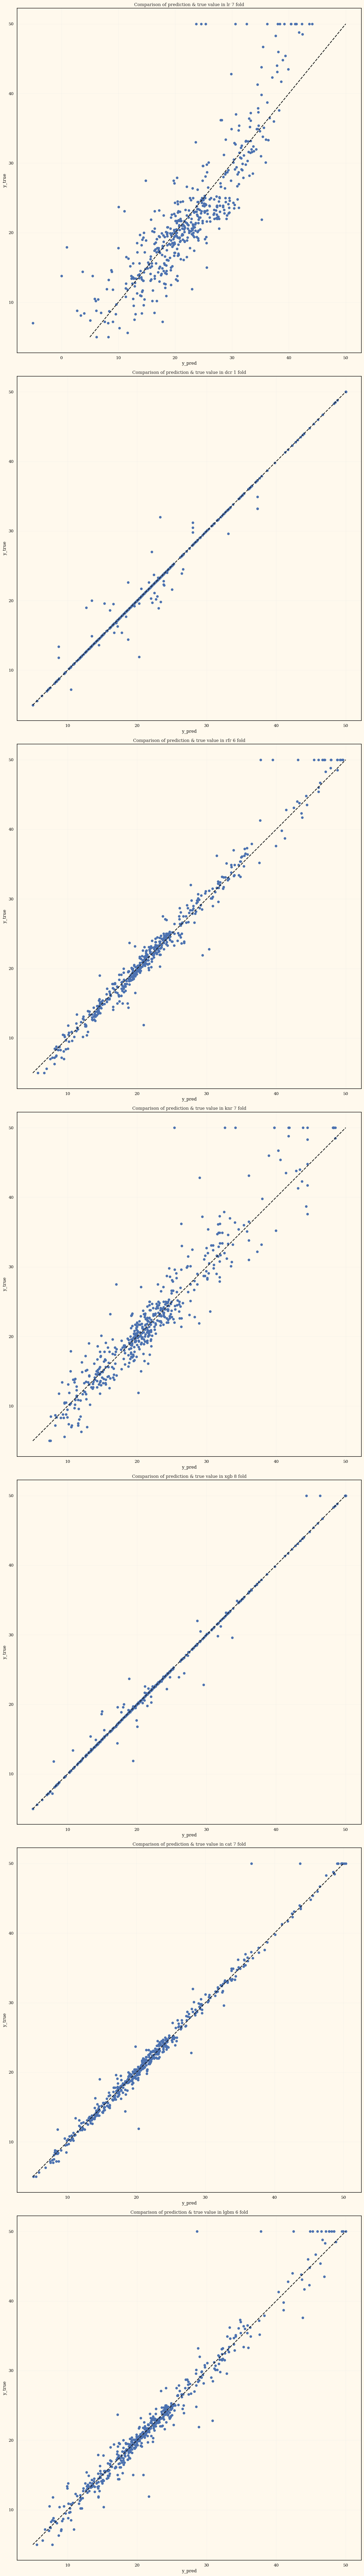

In [23]:
plt.figure(figsize=(14, 14*len(best_models)))
for idx, (model_name, tuple_item) in enumerate(best_models.items()):
    model = tuple_item[0]
    ite = tuple_item[1]
    plt.subplot(len(models), 1, idx+1)
    y_pred = model.predict(X)
    plt.scatter(y_pred, Y)
    plt.title(f'Comparison of prediction & true value in {model_name} {ite} fold')
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
    plt.xlabel('y_pred')
    plt.ylabel('y_true')
plt.tight_layout()
plt.show()

# GridSearchCV search best hyperparameters<a class="anchor" id="GridSearchCV"></a>

## GridSearchCV CatBoostRegressor

In [24]:
from sklearn.model_selection import GridSearchCV
def grid_train_models(parameters, models, X, y, scorer):
    grids = {}
    for (param_name, param_grid), (model_name, model) in zip(parameters.items(), models.items()):
        warnings.filterwarnings("ignore", category=UserWarning, message="[LightGBM] \[Warning\] No further splits with positive gain, best gain: -inf")
        print(f'\033[1;36m====================================================\033[0m')
        grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring=scorer)
        X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42,test_size=0.3)
        grid.fit(X_train, y_train)
        
        print(f"\033[1;35m Results from Grid Search in model {model_name}\033[0m" )
        print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
        print("\n The best score across ALL searched params:\n", grid.best_score_)
        print("\n The best parameters across ALL searched params:\n", grid.best_params_)
        
        # if hyperparameter in grid `refit` is not `True`, grid.predict() same as grid.best_estimator_.predict()
        y_pred = grid.predict(X_test)
        
        # Show result
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f'\033[1;33mR2_Score:{r2}\033[0m')
        print(f'\033[1;33mMSE:{mse}\033[0m')

        grids[model_name] = grid
    return grids

In [25]:
parameters_cat = {
    'learning_rate':[0.01, 0.05, 0.1, 0.2],
    'depth':[5, 8, 10],
    'iterations':[30, 50, 100],
    'l2_leaf_reg': [0.0015, 0.002, 0.1],
    'verbose':[0]
}

parameters_xgbr = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9]
}

parameters_lgbm = {
    'task' : ['predict'],
    'objective': ['root_mean_squared_error'],
    'learning_rate':[ 0.1, 0.05, 0.005 ],
   'num_leaves':[ 7, 15, 31],
   'max_depth' : range(4, 10, 1),
     'n_estimators': [50, 100, 200, 500],
    'verbose':[-100]
}

ens_models = {
    'cat' : CatBoostRegressor(),
    'xgb' : xgb.XGBRegressor(),
    'lgbm' : LGBMRegressor()
}

parameters = { 
    'cat': (parameters_cat),
    'xgb': (parameters_xgbr),
    'lgbm': (parameters_lgbm)
}

scorer = make_scorer(r2_score, greater_is_better=True)

grids = grid_train_models(parameters, ens_models, X, Y, scorer)

 Results from Grid Search in model cat

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8601286376936889

 The best parameters across ALL searched params:
 {'depth': 5, 'iterations': 100, 'l2_leaf_reg': 0.1, 'learning_rate': 0.1, 'verbose': 0}
R2_Score:0.8897317802407725
MSE:8.216426397017887
 Results from Grid Search in model xgb

 The best estimator across ALL searched params:
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight

In [26]:
for grid_name, grid in grids.items():
    print(f'{grid_name} : {grid.best_score_} Best param {grid.best_params_}')

cat : 0.8601286376936889 Best param {'depth': 5, 'iterations': 100, 'l2_leaf_reg': 0.1, 'learning_rate': 0.1, 'verbose': 0}
xgb : 0.8523588061571348 Best param {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 180}
lgbm : 0.8186957487788817 Best param {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'num_leaves': 7, 'objective': 'root_mean_squared_error', 'task': 'predict', 'verbose': -100}


# Final Ensemble Evaluation<a class="anchor" id="Fianl-EnsembleEvaluation"></a>

### Create an ensemble model include top three evaluation models {`cat`, `xgb`, `lgbm`} with hyperparameters we search before

In [27]:
# Todo find the best parame of these three models
from sklearn.ensemble import VotingRegressor

cat_params = grids['cat'].best_params_
xgbr_params = grids['xgb'].best_params_
lgbm_params = grids['lgbm'].best_params_

ensembles = [('cat', CatBoostRegressor(**cat_params)), ('xgbr', xgb.XGBRegressor(**xgbr_params)), ('lgbm', LGBMRegressor(**lgbm_params))]

voting_regressor = VotingRegressor(ensembles)

m, r, mod = train_evaluate_model({'Ensembles':voting_regressor}, X, Y, 10)
mse_scores.update(m)
r2_scores.update(r)
best_models.update(mod)



Training Ensembles models
######################## Training FOLD 1 ########################
MSE: 5.11443
R2_Score: 0.91808
######################## Training FOLD 2 ########################
MSE: 9.54096
R2_Score: 0.88630
######################## Training FOLD 3 ########################
MSE: 7.77391
R2_Score: 0.89830
######################## Training FOLD 4 ########################
MSE: 7.30640
R2_Score: 0.91133
######################## Training FOLD 5 ########################
MSE: 15.32109
R2_Score: 0.83291
######################## Training FOLD 6 ########################
MSE: 10.02425
R2_Score: 0.89424
######################## Training FOLD 7 ########################
MSE: 6.26056
R2_Score: 0.93953
######################## Training FOLD 8 ########################
MSE: 6.86295
R2_Score: 0.92786
######################## Training FOLD 9 ########################
MSE: 6.40829
R2_Score: 0.91801
######################## Training FOLD 10 ########################
MSE: 11.25053
R2_Score: 0.83048


In [28]:
r = np.mean(r2_scores['Ensembles'])
mse = np.mean(mse_scores['Ensembles'])
r_std = np.std(r2_scores['Ensembles'])
mse_std = np.std(mse_scores['Ensembles'])

result = pd.concat([result,pd.DataFrame([[r,r_std, mse, mse_std]], index=['Ensebles'], columns=['R2_Score', 'R2_Score_Std', 'MSE', 'MSE_Std'])], axis=0)
result.style.background_gradient(cmap='YlOrBr')

,R2_Score,R2_Score_Std,MSE,MSE_Std
lr,0.713155,0.076926,23.683410,6.199324
dcr,0.780129,0.068454,18.662935,7.465486
rfr,0.877246,0.039461,10.201209,3.799436
knr,0.837693,0.055596,13.270331,3.800239
xgb,0.895674,0.035491,8.872726,3.700058
cat,0.896715,0.032140,8.628627,3.036018
lgbm,0.873677,0.064521,10.270046,4.841333
Ensebles,0.895705,0.035343,8.586337,2.879397


### Plot predict and true value

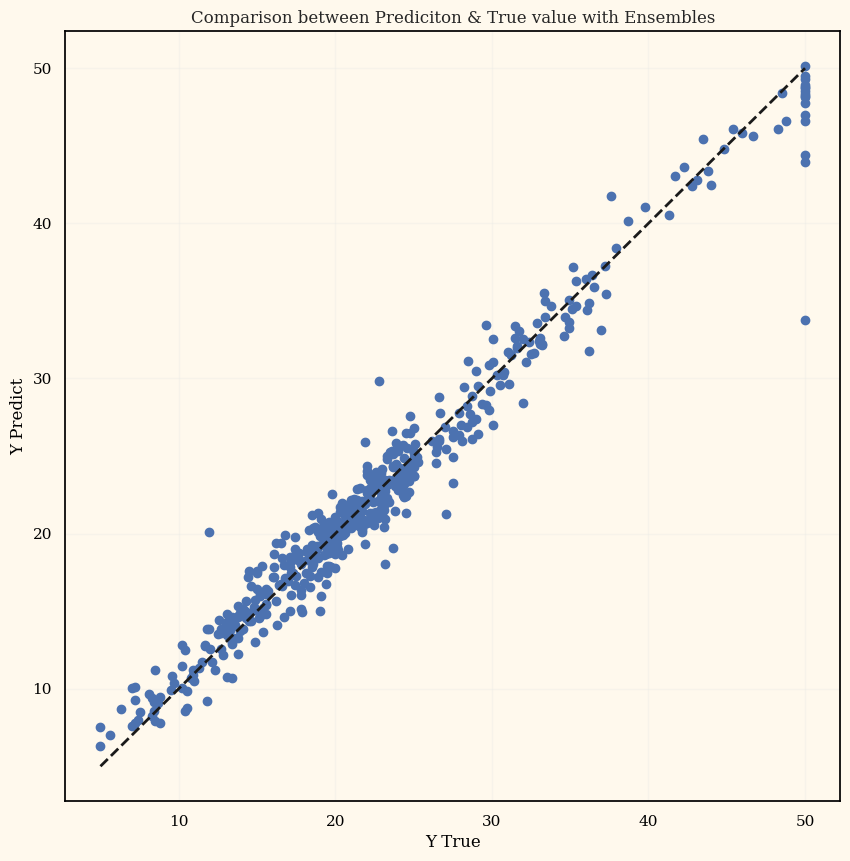

In [29]:
y_pred = voting_regressor.predict(X)

plt.figure(figsize=(10,10))
plt.scatter(x=Y, y=y_pred)
plt.xlabel('Y True')
plt.ylabel('Y Predict')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
plt.title('Comparison between Prediciton & True value with Ensembles')
plt.show()